In [888]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from math import floor

In [889]:
GRASS = "imgs/1_unmodified.png", 1
WINE = "imgs/couple_wine.jpg", 0
CYBERPUNK = "imgs/cyberpunk_car_night.jpg", 0
ADV_TIME = "imgs/good_little_girl.jpg", 0
LAIN = "imgs/lain.jpeg", 0

In [890]:
F_SCL = 2**2
D_SPR = 0
COLOR_NUM = 6

SOURCE = ADV_TIME

/tmp/ipykernel_3479/3068504281.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(SOURCE[0])


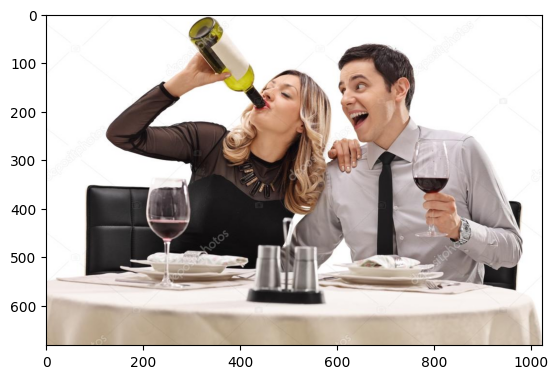

In [891]:
img = imageio.imread(SOURCE[0])

plt.imshow(img)
shape = img.shape


In [892]:
downscale_shape = shape[0]//F_SCL, shape[1]//F_SCL, shape[2]

downscale_img = np.ndarray(downscale_shape,dtype='uint')

In [893]:
for i in range(downscale_shape[0]):
    for j in range(downscale_shape[1]):
        downscale_img[i][j] = img[i*F_SCL][j*F_SCL]

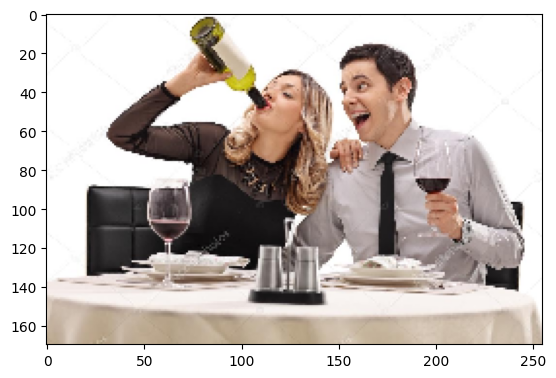

In [894]:
plt.imshow(downscale_img)

In [895]:
filtered_img = np.ndarray(shape,dtype='uint')

In [896]:
for i in range(shape[0]):
    for j in range(shape[1]):
        x = min(i//F_SCL, downscale_shape[0]-1)
        y = min(j//F_SCL, downscale_shape[1]-1)
        filtered_img[i][j] = downscale_img[x][y]

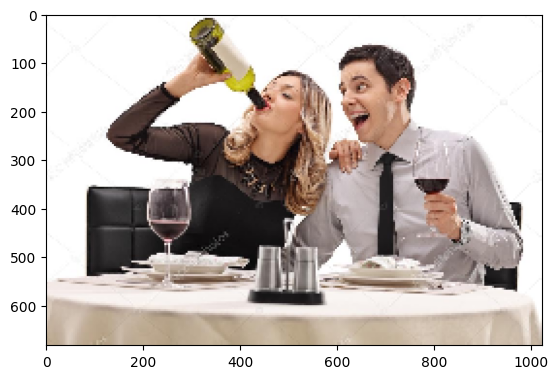

In [897]:
plt.imshow(filtered_img)

In [898]:
bayer8 = np.ndarray((8,8))

bayer8[0] = [0, 32, 8, 40, 2, 34, 10, 42]
bayer8[1] = [48, 16, 56, 24, 50, 18, 58, 26]
bayer8[2] = [12, 44, 4, 36, 14, 46, 6, 38]
bayer8[3] = [60, 28, 52, 20, 62, 30, 54, 22]
bayer8[4] = [3, 35, 11, 43, 1, 33, 9, 41]
bayer8[5] = [51, 19, 59, 27, 49, 17, 57, 25]
bayer8[6] = [15, 47, 7, 39, 13, 45, 5, 37]
bayer8[7] = [63,31, 55, 23, 61, 29, 53, 21]

In [899]:
dithered_img = np.ndarray(shape,dtype='float')

In [900]:
for i in range(shape[0]):
    for j in range(shape[1]):
        x = i % 8
        y = j % 8
        
        M = bayer8[x][y]
        M = (M / (8**2)) - 0.5
        
        pattern_px = filtered_img[i][j]/255 + D_SPR * M
        if SOURCE[1]:
            color = (
                floor(pattern_px[0] * (COLOR_NUM - 1) + 0.5) / (COLOR_NUM-1),
                floor(pattern_px[1] * (COLOR_NUM - 1) + 0.5) / (COLOR_NUM-1),
                floor(pattern_px[2] * (COLOR_NUM - 1) + 0.5) / (COLOR_NUM-1),
                1
            )
        else:
            color = (
                floor(pattern_px[0] * (COLOR_NUM - 1) + 0.5) / (COLOR_NUM-1),
                floor(pattern_px[1] * (COLOR_NUM - 1) + 0.5) / (COLOR_NUM-1),
                floor(pattern_px[2] * (COLOR_NUM - 1) + 0.5) / (COLOR_NUM-1),
            )
        #print(pattern_px)

        dithered_img[i][j] = color

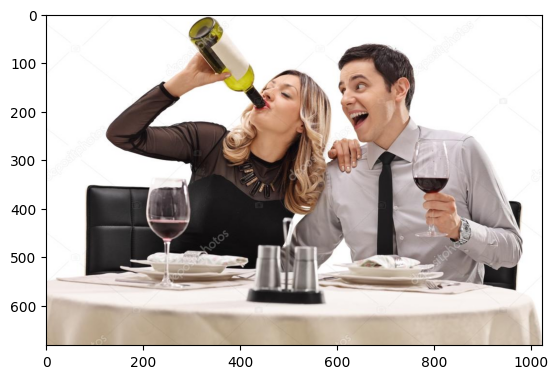

In [901]:
plt.imshow(img)

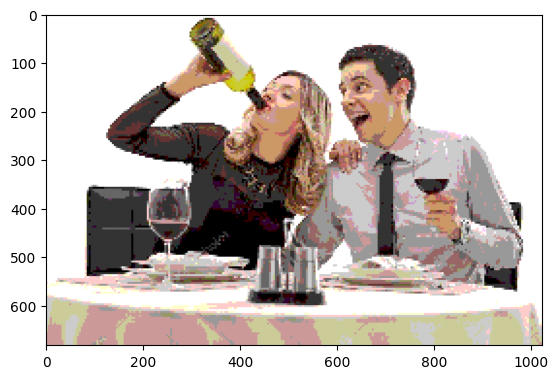

In [902]:
plt.imshow(dithered_img)